# import necessary libraries and load dataset

In [1]:
from sklearn import svm, metrics, datasets, model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
x, y = datasets.load_wine(return_X_y=True)

# define gridsearch and possible parameters 

In [3]:
# the possible parameters 
grid_param = {
    'n_estimators': [50,100, 300, 500],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}



In [4]:
# detrmine the classifier alorithm 
rfc_model = ensemble.RandomForestClassifier()


In [5]:
# cross validation model 
kfold = model_selection.StratifiedShuffleSplit(10, random_state=42)


In [6]:
# bulid gridsearchCV
grid_search = model_selection.GridSearchCV(rfc_model, grid_param, cv=kfold, scoring='accuracy',  verbose=2)


In [7]:
# the cross_val_score method of the sklearn.model_selection library returns the accuracy for all the folds
all_accuracies= model_selection.cross_val_score(rfc_model, X = x, y = y, cv=kfold)

In [8]:
# train the gridsearchCV
grid_search.fit(x, y)


tal=   0.3s
[CV] bootstrap=True, criterion=gini, n_estimators=300 ................
[CV] . bootstrap=True, criterion=gini, n_estimators=300, total=   0.3s
[CV] bootstrap=True, criterion=gini, n_estimators=300 ................
[CV] . bootstrap=True, criterion=gini, n_estimators=300, total=   0.3s
[CV] bootstrap=True, criterion=gini, n_estimators=300 ................
[CV] . bootstrap=True, criterion=gini, n_estimators=300, total=   0.3s
[CV] bootstrap=True, criterion=gini, n_estimators=300 ................
[CV] . bootstrap=True, criterion=gini, n_estimators=300, total=   0.3s
[CV] bootstrap=True, criterion=gini, n_estimators=300 ................
[CV] . bootstrap=True, criterion=gini, n_estimators=300, total=   0.3s
[CV] bootstrap=True, criterion=gini, n_estimators=300 ................
[CV] . bootstrap=True, criterion=gini, n_estimators=300, total=   0.4s
[CV] bootstrap=True, criterion=gini, n_estimators=300 ................
[CV] . bootstrap=True, criterion=gini, n_estimators=300, total=  

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=None,
            train_size=None),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 300, 500]},
             scoring='accuracy', verbose=2)

In [9]:
print("Best Hyperparameters:", grid_search.best_params_)
print("\nBest Score: ", grid_search.best_score_)
print("\nall accuracies: ", all_accuracies)
print("\nmean of all accuracies", all_accuracies.mean())


Best Hyperparameters: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 300}

Best Score:  0.9888888888888889

all accuracies:  [1.         0.94444444 1.         1.         1.         1.
 0.94444444 1.         0.94444444 1.        ]

mean of all accuracies 0.9833333333333334


# Train model based on the best Hyperparameters

In [10]:
# function to split the data into train and test data
def kfold_train_test_split(x, y, train_indices, test_indices):
  return x[train_indices], x[test_indices], y[train_indices], y[test_indices]

In [12]:
# splits the data into 10 splits, using 9 for training and 1 for testing in each iteration
stratified_shuffled_k_fold = model_selection.StratifiedShuffleSplit(n_splits=10, random_state=42) 

# Empty array to store the scores
scores = [] 

for train_indices, test_indices in stratified_shuffled_k_fold.split(x, y): # y is needed here for stratification, similar to stratify = y. 
  # Split data using our predefined function
  x_train, x_test, y_train, y_test = kfold_train_test_split(x, y, train_indices, test_indices)

  # Train model
  rfc_model = ensemble.RandomForestClassifier(bootstrap=True, criterion= 'gini', n_estimators= 300, random_state=42)
  rfc_model.fit(x_train, y_train)

  # Predict using test set
  y_pred = rfc_model.predict(x_test)

  # Calculate scores
  accuracy = metrics.accuracy_score(y_test, y_pred)

  # Append to scores array
  scores.append(accuracy)

In [13]:
# Conver scores array to dataframe
scores_df = pd.DataFrame(scores)
scores_df

,0
0,1.000000
1,1.000000
2,1.000000
3,1.000000
4,1.000000
5,1.000000
6,0.944444
7,1.000000
8,0.944444
9,1.000000


In [14]:
# Calculate the mean of the scores
scores_df.mean()

0    0.988889
dtype: float64

# Finding feature important 

In [16]:
data = datasets.load_wine()
feature_imp = pd.Series(rfc_model.feature_importances_,index=data.feature_names).sort_values(ascending=False)
feature_imp

flavanoids                      0.175149
proline                         0.166927
color_intensity                 0.151976
alcohol                         0.127704
od280/od315_of_diluted_wines    0.103667
hue                             0.080275
total_phenols                   0.050275
magnesium                       0.035507
alcalinity_of_ash               0.028268
malic_acid                      0.027827
proanthocyanins                 0.025781
ash                             0.014801
nonflavanoid_phenols            0.011843
dtype: float64

No handles with labels found to put in legend.


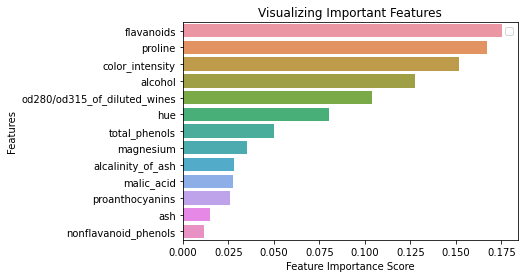

In [17]:
# Visualize the feature importance
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()